In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
print(train_images.shape, train_images[0].shape)
print(test_images.shape, test_images[0].shape)

print(train_labels[0])

(60000, 28, 28) (28, 28)
(10000, 28, 28) (28, 28)
5


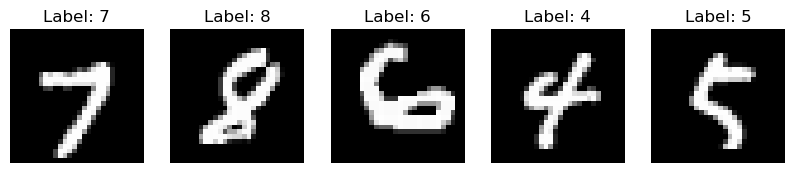

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Plot some examples
num_examples = 5
plt.figure(figsize=(10, 5))

for i in range(num_examples):
    plt.subplot(1, num_examples, i + 1)
    rand_index = np.random.randint(0, train_images.shape[0])
    plt.imshow(train_images[rand_index], cmap='gray')
    plt.title(f"Label: {train_labels[rand_index]}")
    plt.axis('off')
plt.show()

In [5]:
"""This indicates that there are still 60,000 images, but now each image has dimensions 28x28 pixels 
and a single channel (since the images are grayscale). The additional dimension (1) represents 
the grayscale channel.

This operation "astype('float32') / 255" scales down the pixel values to be in the range [0, 1]. This is known as normalization and is a 
common preprocessing step in deep learning to help improve convergence during training and make optimization 
more stable.
""" 
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
print(train_images.shape, train_images[0].shape)
print(test_images.shape, test_images[0].shape)

print(train_labels[0])

(60000, 28, 28, 1) (28, 28, 1)
(10000, 28, 28, 1) (28, 28, 1)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28, 1)
(60000, 10)


In [7]:
import tensorflow as tf

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(8, kernel_size=(3, 3), padding='same'), # 8 represents the number of filters.
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
])

# Compile the model
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Train the model
model.fit(train_images, train_labels, batch_size=64, epochs=10, validation_split=0.1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)


Epoch 1/10


2024-03-09 13:24:16.841366: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


844/844 [==============================] - 6s 8ms/step - loss: 0.8104 - accuracy: 0.7751 - val_loss: 0.3651 - val_accuracy: 0.9135
Epoch 2/10
844/844 [==============================] - 6s 7ms/step - loss: 0.3616 - accuracy: 0.9050 - val_loss: 0.2487 - val_accuracy: 0.9365
Epoch 3/10
844/844 [==============================] - 6s 8ms/step - loss: 0.2770 - accuracy: 0.9253 - val_loss: 0.1995 - val_accuracy: 0.9483
Epoch 4/10
844/844 [==============================] - 6s 7ms/step - loss: 0.2314 - accuracy: 0.9376 - val_loss: 0.1693 - val_accuracy: 0.9553
Epoch 5/10
844/844 [==============================] - 7s 8ms/step - loss: 0.2013 - accuracy: 0.9452 - val_loss: 0.1473 - val_accuracy: 0.9615
Epoch 6/10
844/844 [==============================] - 6s 8ms/step - loss: 0.1799 - accuracy: 0.9512 - val_loss: 0.1333 - val_accuracy: 0.9662
Epoch 7/10
844/844 [==============================] - 7s 8ms/step - loss: 0.1636 - accuracy: 0.9554 - val_loss: 0.1219 - val_accuracy: 0.9695
Epoch 8/10
844/84

In [8]:
test_image = test_images[0].reshape(1, 28, 28, 1)
print(test_images[0].shape)
print(test_image.shape)

(28, 28, 1)
(1, 28, 28, 1)


In [11]:
activations = model.predict(test_image)
class_activations = np.argmax(prediction, axis=1) # the predicted class labels.

plt.imshow(test_image[0], cmap='gray')
plt.title(f"Label: {class_prediction}")

1/1 [==============================] - 0s 17ms/step


NameError: name 'prediction' is not defined

conv2d: (10,)


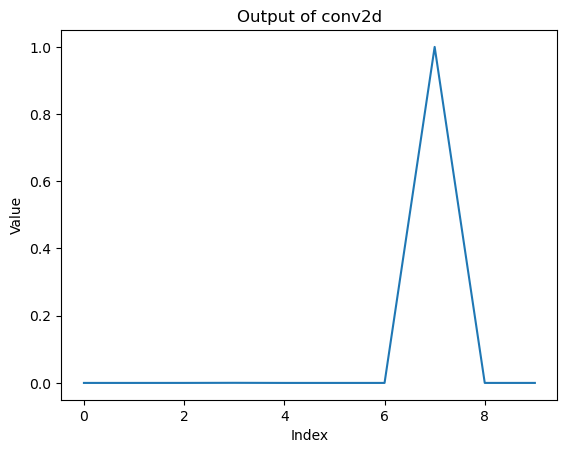

In [10]:
# Visualize the output of each layer
for layer_name, layer_output in zip([layer.name for layer in model.layers], activations):
    print(f'{layer_name}: {layer_output.shape}')

    # If the output is 4D (batch_size, height, width, channels), you can visualize each channel separately
    if len(layer_output.shape) == 4:
        num_channels = layer_output.shape[-1]
        fig, axes = plt.subplots(1, num_channels)
        for i in range(num_channels):
            axes[i].imshow(layer_output[0, :, :, i], cmap='viridis')
            axes[i].axis('off')
        plt.suptitle(f'Output of {layer_name}')
        plt.show()
    else:
        # For other shapes, you can simply plot the output
        plt.plot(layer_output.flatten())
        plt.title(f'Output of {layer_name}')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.show()